In [1]:
using PyCall
unshift!(PyVector(pyimport("sys")["path"]), "");
@pyimport Compute_Jacobian_Sioux_multi_class

In [2]:
numNodes = Compute_Jacobian_Sioux_multi_class.numNodes;
numLinks = Compute_Jacobian_Sioux_multi_class.numLinks;
numODpairs = Compute_Jacobian_Sioux_multi_class.numODpairs;
od_pairs = Compute_Jacobian_Sioux_multi_class.od_pairs;
link_list_js = Compute_Jacobian_Sioux_multi_class.link_list_js;
link_length_list = Compute_Jacobian_Sioux_multi_class.link_length_list;

In [3]:
include("../Julia_files/load_network_uni_class.jl");
include("../Julia_files/initia_data.jl");
include("prepare_data_Sioux.jl");
include("extract_data_Sioux.jl");
include("../Julia_files/tap_MSA_multi_class.jl");
include("../Julia_files/inverseVI_multi_class.jl");
include("../Julia_files/demands_adjustment_gradi_multi_class.jl");

In [4]:
demandsDictCar[0] = demandsDict[0]["car"]
demandsDictCar[1] = demandsDict[1]["car"]
demandsDictTruck[0] = demandsDict[0]["truck"]
demandsDictTruck[1] = demandsDict[1]["truck"]

Dict{Any,Any} with 576 entries:
  (23,8)  => 60.4697
  (8,23)  => 54.7964
  (6,9)   => 87.858
  (18,3)  => 0.0
  (21,13) => 118.198
  (22,16) => 262.741
  (15,17) => 309.023
  (22,14) => 223.895
  (13,9)  => 131.79
  (23,10) => 350.569
  (24,22) => 229.681
  (8,9)   => 173.166
  (9,1)   => 95.7743
  (17,14) => 132.557
  (16,6)  => 176.238
  (16,12) => 130.337
  (16,13) => 123.39
  (22,2)  => 18.8181
  (24,3)  => 0.0
  (7,16)  => 268.027
  (1,12)  => 41.9157
  (4,5)   => 101.429
  (11,8)  => 157.406
  (18,21) => 19.9762
  (19,4)  => 41.9853
  ⋮       => ⋮

In [5]:
demandsDiffDictCar[1] = norm(demandsDicToVec(demandsDictCar[1]) - demandsDicToVec(demandsDictCar[0]))/
norm(demandsDicToVec(demandsDictCar[0]));

demandsDiffDictTruck[1] = norm(demandsDicToVec(demandsDictTruck[1]) - demandsDicToVec(demandsDictTruck[0]))/
norm(demandsDicToVec(demandsDictTruck[0] ));

In [6]:
demandsDict

Dict{Any,Any} with 2 entries:
  0 => Dict{Any,Any}(Pair{Any,Any}("car",Dict{Any,Any}(Pair{Any,Any}((23,8),240…
  1 => Dict{Any,Any}(Pair{Any,Any}("car",Dict{Any,Any}(Pair{Any,Any}((23,8),241…

In [7]:
demandsVecDictCar[0] = demandsDicToVec(demandsDictCar[0]);
demandsVecDictTruck[0] = demandsDicToVec(demandsDictTruck[0]);

In [8]:
demandsVecDictCar

Dict{Any,Any} with 1 entry:
  0 => [80.0,80.0,400.0,160.0,240.0,400.0,640.0,400.0,1040.0,400.0  …  320.0,32…

In [9]:
demandsVecDictTruck

Dict{Any,Any} with 1 entry:
  0 => [20.0,20.0,100.0,40.0,60.0,100.0,160.0,100.0,260.0,100.0  …  80.0,80.0,6…

In [10]:
fcoeffs = [1, 0, 0, 0, .15];

# get observed flow vector (corresponding to ground truth demands and ground truth costs)
tapFlowDicDict[0], tapFlowVecDict[0] = tapMSA_Multi(demandsDictCar[0], demandsDictTruck[0], fcoeffs);

In [11]:
tapFlowDicDict[0]

Dict{Any,Any} with 2 entries:
  "car"   => Dict{Any,Any}(Pair{Any,Any}((15,19),14759.9),Pair{Any,Any}((20,21)…
  "truck" => Dict{Any,Any}(Pair{Any,Any}((15,19),3814.0),Pair{Any,Any}((20,21),…

In [12]:
tapFlowVecDict[0]

2×76 Array{Float64,2}:
 4967.28  7874.96  4993.52  4801.6   …  5775.28  8412.64  8266.0   5744.48
 1169.66  1893.72  1173.44  1128.44     1709.74  2117.6   1822.12  1695.02

In [13]:
# get arcs data corresponding to ground truth demands and flows
arcsDict[0] = observFlow("./benchmark_data/Sioux_net.txt", tapFlowDicDict[0]);

In [14]:
arcsDict[0]

Dict{Any,Any} with 76 entries:
  (15,19) => Arc(15,19,14564.8,3.0,22387.9,14759.9,3814.0)
  (20,21) => Arc(20,21,5059.91,6.0,7605.52,5083.68,1260.92)
  (22,20) => Arc(22,20,5075.7,5.0,8415.92,5622.64,1396.64)
  (23,22) => Arc(23,22,5000.0,4.0,11239.7,7425.68,1907.02)
  (10,11) => Arc(10,11,10000.0,5.0,20994.7,14105.5,3444.6)
  (8,9)   => Arc(8,9,5050.19,10.0,8780.08,5785.68,1497.2)
  (13,12) => Arc(13,12,25900.2,3.0,17389.1,11640.6,2874.26)
  (24,21) => Arc(24,21,4885.36,3.0,11910.2,8266.0,1822.12)
  (3,1)   => Arc(3,1,23403.5,4.0,11628.6,7848.72,1889.94)
  (19,17) => Arc(19,17,4823.95,2.0,10807.5,7355.52,1726.0)
  (4,5)   => Arc(4,5,17782.8,2.0,23041.0,15148.6,3946.18)
  (17,16) => Arc(17,16,5229.91,2.0,13142.9,8931.04,2105.92)
  (20,22) => Arc(20,22,5075.7,5.0,8414.04,5612.96,1400.54)
  (22,21) => Arc(22,21,5229.91,2.0,9687.6,6767.52,1460.04)
  (18,16) => Arc(18,16,19679.9,3.0,21557.2,14160.2,3698.54)
  (6,5)   => Arc(6,5,4948.0,4.0,8888.6,5902.8,1492.9)
  (16,17) => Arc(16,17,5229.9

In [15]:
deg = 7
c = 1.5
lam = 1e2

coeffs_dict[(deg, c, lam, 1)], objInvVIDict[1] = train(lam, deg, c, demandsDictCar[1], demandsDictTruck[1], 
arcsDict[0]);

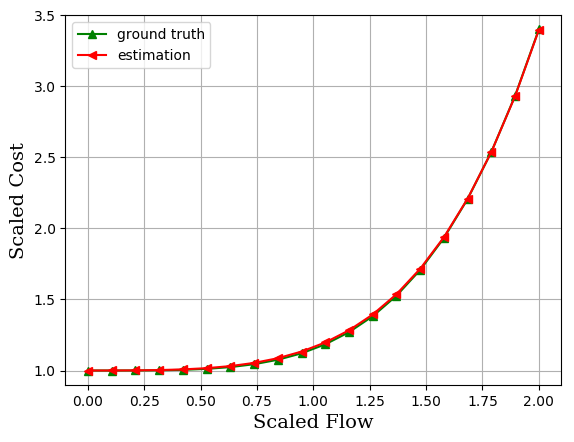

In [16]:
using PyPlot

iterN = 1

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Sioux_iter_$(iterN)_multi_class.pdf")

In [17]:
demandsVecDictCar[1] = demandsDicToVec(demandsDictCar[1]);
demandsVecDictTruck[1] = demandsDicToVec(demandsDictTruck[1]);

objFunDict[1] = objF(demandsVecDictCar[1], demandsVecDictTruck[1], coeffs_dict[(deg, c, lam, 1)]);

In [18]:
# get initial flow vector (corresponding to initial demands)
tapFlowDicDict[1], tapFlowVecDict[1] = tapMSA_Multi(demandsDictCar[1], demandsDictTruck[1], 
coeffs_dict[(deg, c, lam, 1)]);

In [19]:
tapFlowDicDict[1]

Dict{Any,Any} with 2 entries:
  "car"   => Dict{Any,Any}(Pair{Any,Any}((15,19),14831.2),Pair{Any,Any}((20,21)…
  "truck" => Dict{Any,Any}(Pair{Any,Any}((15,19),3769.22),Pair{Any,Any}((20,21)…

In [20]:
tapFlowVecDict[1] 

2×76 Array{Float64,2}:
 4984.11  7988.82  5143.4   4792.52  …  5715.08  8384.96  8249.99  5661.29
 1224.15  1878.03  1166.29  1176.45     1746.29  2125.52  1847.31  1658.12

In [21]:
# get arcs data corresponding to initial demands and flows
arcsDict[1] = observFlow("./benchmark_data/Sioux_net.txt", tapFlowDicDict[1]);

In [22]:
linkCostDicDict[1] = tapFlowVecToLinkCostDict(tapFlowVecDict[1], coeffs_dict[(deg, c, lam, 1)]);

In [23]:
linkCostDicDict[1]["car"]

Dict{Any,Any} with 76 entries:
  "32" => 18.2197
  "29" => 24.2121
  "1"  => 4.05623
  "54" => 3.66138
  "2"  => 6.01379
  "74" => 19.0755
  "41" => 12.1116
  "65" => 19.0517
  "51" => 13.4329
  "53" => 2.1923
  "27" => 22.347
  "75" => 4.93066
  "42" => 23.0596
  "33" => 22.672
  "28" => 34.1848
  "50" => 24.3318
  "52" => 9.17814
  "63" => 10.4771
  "26" => 19.7579
  "10" => 2.90008
  "24" => 8.84271
  "58" => 14.745
  "25" => 8.8601
  "23" => 23.1684
  "49" => 3.64987
  ⋮    => ⋮

In [24]:
linkCostDicDict[1]["truck"]

Dict{Any,Any} with 76 entries:
  "32" => 20.0417
  "29" => 26.6333
  "1"  => 4.46185
  "54" => 4.02752
  "2"  => 6.61517
  "74" => 20.983
  "41" => 13.3228
  "65" => 20.9569
  "51" => 14.7762
  "53" => 2.41153
  "27" => 24.5817
  "75" => 5.42372
  "42" => 25.3655
  "33" => 24.9392
  "28" => 37.6033
  "50" => 26.7649
  "52" => 10.096
  "63" => 11.5248
  "26" => 21.7337
  "10" => 3.19009
  "24" => 9.72699
  "58" => 16.2195
  "25" => 9.74611
  "23" => 25.4853
  "49" => 4.01485
  ⋮    => ⋮

In [25]:
link_length_list

76-element Array{Any,1}:
 6.0
 4.0
 6.0
 5.0
 4.0
 4.0
 4.0
 4.0
 2.0
 6.0
 2.0
 4.0
 5.0
 ⋮  
 2.0
 3.0
 3.0
 5.0
 2.0
 4.0
 4.0
 4.0
 2.0
 4.0
 3.0
 2.0

In [26]:
link_length_list_car = [linkCostDicDict[1]["car"]["$(i)"] for i=0:numLinks-1]
link_length_list_truck = [linkCostDicDict[1]["truck"]["$(i)"] for i=0:numLinks-1]

link_length_list_dict[0] = link_length_list_car
link_length_list_dict[1] = link_length_list_truck

link_length_list_dict_dict[1] = link_length_list_dict

Dict{Any,Any} with 2 entries:
  0 => [6.01354,4.05623,6.01379,8.28058,4.05438,5.09259,4.12597,5.08481,2.87796…
  1 => [6.61489,4.46185,6.61517,9.10864,4.45982,5.60185,4.53857,5.5933,3.16576,…

In [27]:
jacobiSpiessDict[1] = Compute_Jacobian_Sioux_multi_class.jacobianSpiess(numNodes, numLinks, numODpairs, od_pairs, 
link_list_js, link_length_list_dict_dict[1]);

In [28]:
jacobiSpiessDict[1]

552×76×2 Array{Float64,3}:
[:, :, 1] =
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0 

In [29]:
# maximum number of iterations
N = 50;  

# Armijo rule parameters
rho = 2;
M = 10;

# search direction parameter
epsilon_1 = 0;

# stop criterion parameter
epsilon_2 = 1e-20;

In [30]:
for l = 1:N
    
    jacobDict[l] = jacobiSpiessDict[l]

    descDirecDict[l] = descDirec(tapFlowVecDict[l], tapFlowVecDict[0], jacobDict[l], numODpairs, numLinks);
    
    demandsVecDictCar[l] = demandsDicToVec(demandsDictCar[l]);
    demandsVecDictTruck[l] = demandsDicToVec(demandsDictTruck[l]);

    searchDirecDict[l] = searchDirec(demandsVecDictCar[l], demandsVecDictTruck[l], descDirecDict[l], epsilon_1);
    
    thetaMaxDict[l] = thetaMax(demandsVecDictCar[l], demandsVecDictTruck[l], searchDirecDict[l]);
    
    demandsVecDictCar[l+1] = similar(demandsVecDictCar[0]);
    demandsVecDictTruck[l+1] = similar(demandsVecDictTruck[0]);
    
    demandsVecDictCar[l+1], demandsVecDictTruck[l+1], objFunDict[l+1] = armijo(objFunDict[l], demandsVecDictCar[l], 
    demandsVecDictTruck[l], coeffs_dict[(deg, c, lam, l)], searchDirecDict[l], thetaMaxDict[l], rho, M);
    
    demandsDictCar[l+1] = demandsVecToDic(demandsVecDictCar[l+1]);
    demandsDictTruck[l+1] = demandsVecToDic(demandsVecDictTruck[l+1]);
    
    tapFlowDicDict[l+1], tapFlowVecDict[l+1] = tapMSA_Multi(demandsDictCar[l+1], demandsDictTruck[l+1], 
    coeffs_dict[(deg, c, lam, l)]);
        
    arcsDict[l+1] = observFlow("./benchmark_data/Sioux_net.txt", tapFlowDicDict[l+1]);
        
    coeffs_dict[(deg, c, lam, l+1)], objInvVIDict[l+1] = train(lam, deg, c, demandsDictCar[l+1], 
    demandsDictTruck[l+1], arcsDict[0]);
    
    linkCostDicDict[l+1] = tapFlowVecToLinkCostDict(tapFlowVecDict[l+1], coeffs_dict[(deg, c, lam, l+1)]);
        
    #######################################
    link_length_list_dict[0] = [linkCostDicDict[l+1]["car"]["$(i)"] for i=0:numLinks-1]
    link_length_list_dict[1] = [linkCostDicDict[l+1]["truck"]["$(i)"] for i=0:numLinks-1]
    link_length_list_dict_dict[l+1] = link_length_list_dict
    #######################################
    
    jacobiSpiessDict[l+1] = Compute_Jacobian_Sioux_multi_class.jacobianSpiess(numNodes, numLinks, numODpairs, 
    od_pairs, link_list_js, link_length_list_dict_dict[l+1]);
        
    demandsDiffDictCar[l+1] = norm(demandsVecDictCar[l+1] - demandsVecDictCar[0]) / norm(demandsVecDictCar[0]);
    demandsDiffDictTruck[l+1] = norm(demandsVecDictTruck[l+1] - demandsVecDictTruck[0]) / 
    norm(demandsVecDictTruck[0]);
    
    # stopping criterion
    if (objFunDict[l] - objFunDict[l+1]) / objFunDict[1] < epsilon_2
        break
    end
        
end

# normalize objective function value
for l = 1:(length(objFunDict))
    norObjFunDict[l] = objFunDict[l] / objFunDict[1];
end

In [31]:
demandsVecDictCar

Dict{Any,Any} with 7 entries:
  0 => [80.0,80.0,400.0,160.0,240.0,400.0,640.0,400.0,1040.0,400.0  …  320.0,32…
  4 => [84.2532,74.5312,415.831,167.756,232.733,360.751,697.716,358.579,997.548…
  2 => [84.6432,75.2432,416.194,168.657,233.251,361.302,698.113,360.595,999.266…
  3 => [84.2574,74.5341,415.832,167.76,232.74,360.759,697.722,358.591,997.56,40…
  5 => [84.2488,74.5288,415.831,167.755,232.727,360.74,697.707,358.575,997.547,…
  6 => [84.2488,74.5288,415.831,167.755,232.727,360.74,697.707,358.575,997.547,…
  1 => [84.7529,75.9852,416.216,169.013,233.301,360.534,697.676,362.113,1000.3,…

In [32]:
demandsVecDictTruck

Dict{Any,Any} with 7 entries:
  0 => [20.0,20.0,100.0,40.0,60.0,100.0,160.0,100.0,260.0,100.0  …  80.0,80.0,6…
  4 => [20.5908,19.1756,104.724,42.7813,57.1878,87.9089,172.744,90.8076,249.897…
  2 => [20.8331,19.0986,104.473,42.6405,57.6573,88.763,173.409,90.8154,250.147,…
  3 => [20.5917,19.1757,104.724,42.7817,57.1895,87.9117,172.747,90.8085,249.899…
  5 => [20.5897,19.175,104.723,42.7791,57.1857,87.9063,172.742,90.8028,249.889,…
  6 => [20.5897,19.175,104.723,42.7791,57.1857,87.9063,172.742,90.8028,249.889,…
  1 => [21.1882,18.9963,104.054,42.2533,58.3253,90.1334,174.419,90.5283,250.076…

In [33]:
norObjFunDict

Dict{Any,Any} with 6 entries:
  4 => 0.395387
  2 => 0.537169
  3 => 0.427557
  5 => 0.389929
  6 => 0.389929
  1 => 1.0

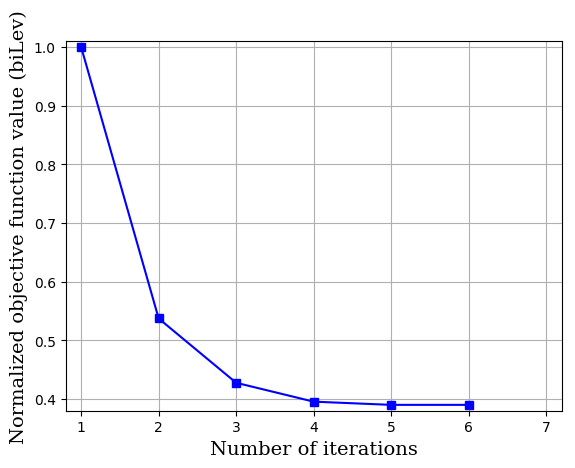

In [34]:
using PyPlot

iterNum = 1:(length(norObjFunDict))

objFun = map(iterNum->norObjFunDict[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, objFun, "s-b")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(norObjFunDict) + 1 + .2)
ylim(minimum(objFun)-.01, maximum(objFun)+.01)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized objective function value (biLev)", fontdict=font1)

savefig("./results/objFun_biLev_Sioux.pdf")

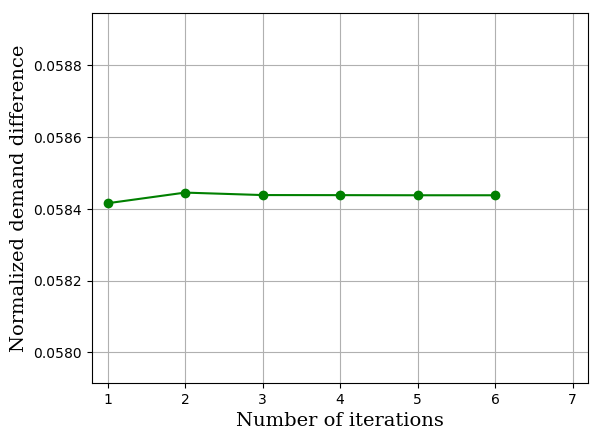

In [35]:
using PyPlot

iterNum = 1:(length(demandsDiffDictCar))

demandsDiff = map(iterNum->demandsDiffDictCar[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, demandsDiff, "o-g")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(demandsDiffDictCar) + 1 + .2)
ylim(minimum(demandsDiff)-.0005, maximum(demandsDiff)+.0005)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized demand difference", fontdict=font1)

savefig("./results/demandsDiff_biLev_Sioux_car.pdf")

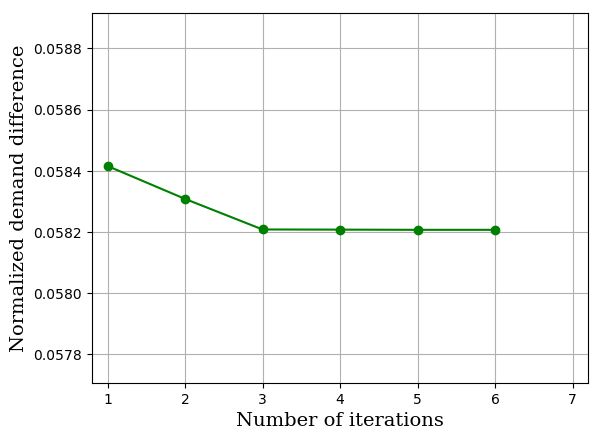

In [36]:
using PyPlot

iterNum = 1:(length(demandsDiffDictTruck))

demandsDiff = map(iterNum->demandsDiffDictTruck[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, demandsDiff, "o-g")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(.8, length(demandsDiffDictTruck) + 1 + .2)
ylim(minimum(demandsDiff)-.0005, maximum(demandsDiff)+.0005)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Normalized demand difference", fontdict=font1)

savefig("./results/demandsDiff_biLev_Sioux_truck.pdf")

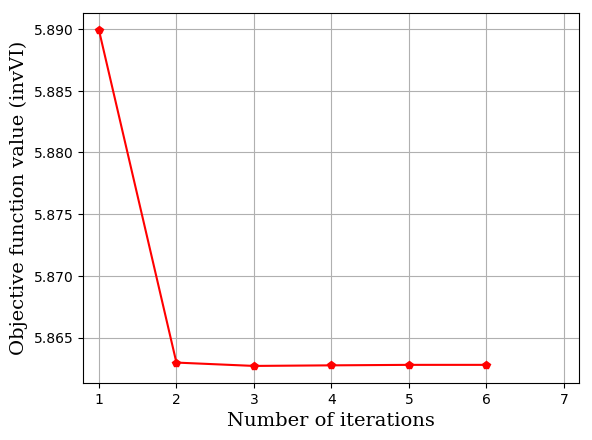

In [37]:
using PyPlot

iterNum = 1:(length(objInvVIDict))

objFun = map(iterNum->objInvVIDict[iterNum], iterNum)

# PyPlot.plot(iterNum, objFun, "s-g", label="True")

PyPlot.plot(iterNum, objFun, "p-r")

# legend(loc="upper right",fancybox="true") 

grid("on")

xlim(0.8, length(objInvVIDict) + 1 + .2)
# ylim(0.9, 2.0)

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)

xlabel("Number of iterations", fontdict=font1)
ylabel("Objective function value (invVI)", fontdict=font1)

savefig("./results/objFun_invVI_Sioux.pdf")

In [38]:
coeffs_dict

Dict{Any,Any} with 6 entries:
  (7,1.5,100.0,5) => [1.0,-0.00070028,0.00988699,0.0609809,0.0739078,0.0280809,…
  (7,1.5,100.0,6) => [1.0,-0.00070028,0.00988699,0.0609809,0.0739078,0.0280809,…
  (7,1.5,100.0,1) => [1.0,-0.000468825,0.00563673,0.0582165,0.0732113,0.0283056…
  (7,1.5,100.0,2) => [1.0,-0.000694434,0.00977586,0.0609789,0.0739631,0.0280819…
  (7,1.5,100.0,3) => [1.0,-0.000700883,0.00989854,0.0609797,0.0739028,0.0280812…
  (7,1.5,100.0,4) => [1.0,-0.000700558,0.00989231,0.0609803,0.0739055,0.0280811…

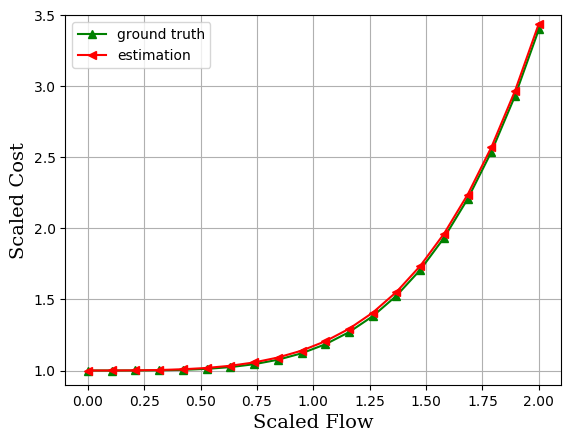

In [39]:
using PyPlot

iterN = 2

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Sioux_iter_$(iterN)_multi_class.pdf")

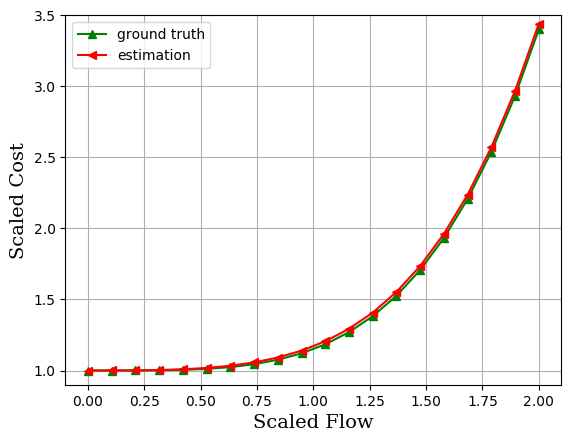

In [40]:
using PyPlot

iterN = 3

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Sioux_iter_$(iterN)_multi_class.pdf")

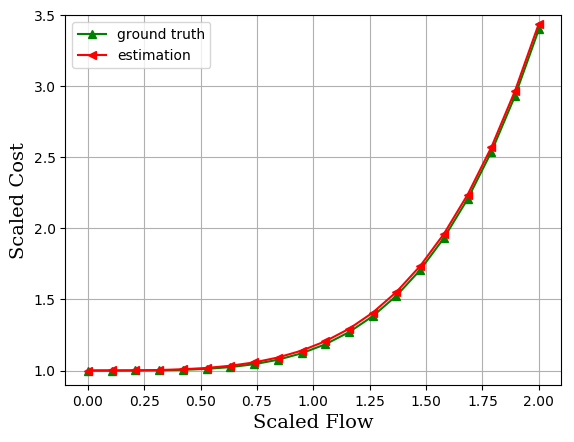

In [41]:
using PyPlot

iterN = length(coeffs_dict)

true_coeffs = [1, 0, 0, 0, .15]
# true_coeffs = [1, .2, .5, .8, .15]

est_coeffs = coeffs_dict[(deg, c, lam, iterN)]

xs = linspace(0, 2, 20)
zs_true = map(x->polyEval(true_coeffs, x), xs)

zs = map(x->polyEval(est_coeffs, x), xs)

PyPlot.plot(xs, zs_true, "^-g", label="ground truth")
PyPlot.plot(xs, zs, "<-r", label="estimation")

legend(loc="upper left",fancybox="true") 
# PyPlot.plot(xs, ys, "--b")
grid("on")
xlim(-0.1, 2.1);
ylim(0.9, 3.5);

font1 = Dict("family"=>"serif","color"=>"k","weight"=>"normal","size"=>14)
xlabel("Scaled Flow", fontdict=font1)
ylabel("Scaled Cost", fontdict=font1)

savefig("./results/fitting_Sioux_iter_$(iterN)_multi_class.pdf")

In [42]:
outfile = open("./results/norObjFunDict.json", "w")

JSON.print(outfile, norObjFunDict)

close(outfile)

In [43]:
outfile = open("./results/demandsDiffDictCar.json", "w")

JSON.print(outfile, demandsDiffDictCar)

close(outfile)

In [44]:
outfile = open("./results/demandsDiffDictTruck.json", "w")

JSON.print(outfile, demandsDiffDictTruck)

close(outfile)

In [45]:
outfile = open("./results/objInvVIDict.json", "w")

JSON.print(outfile, objInvVIDict)

close(outfile)

In [46]:
outfile = open("./results/coeffs_dict.json", "w")

JSON.print(outfile, coeffs_dict)

close(outfile)

In [47]:
outfile = open("./results/demandsVecDictCar.json", "w")

JSON.print(outfile, demandsVecDictCar)

close(outfile)

In [48]:
outfile = open("./results/demandsVecDictTruck.json", "w")

JSON.print(outfile, demandsVecDictTruck)

close(outfile)

In [49]:
outfile = open("./results/demandsDictCar.json", "w")

JSON.print(outfile, demandsDictCar)

close(outfile)

In [50]:
outfile = open("./results/demandsDictTruck.json", "w")

JSON.print(outfile, demandsDictTruck)

close(outfile)

In [51]:
outfile = open("./results/tapFlowDicDict.json", "w")

JSON.print(outfile, tapFlowDicDict)

close(outfile)

In [52]:
outfile = open("./results/tapFlowVecDict.json", "w")

JSON.print(outfile, tapFlowVecDict)

close(outfile)